# Экстраполяция временных рядов
### Многопараметрическая экстраполяция

Под множественными регрессионными моделями будем понимать класс моделей, в которых значения одного или множества исследуемых параметров зависят **от нескольких (более одного) других параметров**.

In [1]:
# импортируем библиотеки

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Загрузим данные. В практической работе можно использовать эти данные или взять данные из открытых источников
# помните о баллах

# Стоимость и объем продаж акций компании Google (работа с временными рядами, может быть решена задача прогнозирования)
# Возьмём DataSet1_3.csv
data1 = pd.read_csv('./DataSet1_3.csv')
# data1.head()
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3019 non-null   object 
 1   Open    3019 non-null   float64
 2   High    3019 non-null   float64
 3   Low     3019 non-null   float64
 4   Close   3019 non-null   float64
 5   Volume  3019 non-null   int64  
 6   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 165.2+ KB


По условиям работы, мы выберем 100 значений для прогнозирования.

Добавление значений целевого параметра со сдвигом на один шаг в прошлое при построении регрессии называется созданием лагов (lags) для целевой переменной. Это позволяет учесть зависимость текущего значения целевой переменной от ее предыдущих значений.

In [27]:
# Выберем данные
n1 = 101
n2 = 300

data1['lag'] = data1['Close'].iloc[n1-1:n2].shift(1).copy()

data = data1[n1:n2].copy().reset_index(drop=True)

# сделаем колонку "Days", дату переведём в дни
data['Date'] = pd.to_datetime(data['Date'], format="%Y-%m-%d")
data['Days'] = (data['Date'] - data['Date'].iloc[0]).dt.days
data['Days'] -= data['Days'].iloc[0] - 1

data = data.drop(columns=['Date','Name', 'Volume'])
# удалим лишние колонки. Какие?

In [28]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['Close'])
y = data['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

### Метод наименьших квадратов

Используем МНК для многопараметрической регрессии

In [29]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
print(np.array(X_train))
# model.fit(np.array(X_train), np.array(y_train))
# res_mnk = model.predict(np.array(X_test))

[[1.8933000e+02 1.9069000e+02 1.8591000e+02 4.3159300e+06 1.9087000e+02
  1.0000000e+00]
 [1.8709000e+02 1.8931000e+02 1.8357000e+02 7.9827320e+06 1.8616000e+02
  2.0000000e+00]
 [1.8696000e+02 1.9169000e+02 1.8599000e+02 6.2802230e+06 1.8610000e+02
  3.0000000e+00]
 [1.9292000e+02 1.9373000e+02 1.8891000e+02 6.3864420e+06 1.9150000e+02
  4.0000000e+00]
 [1.8828000e+02 1.9092000e+02 1.8726000e+02 5.5599920e+06 1.8991000e+02
  7.0000000e+00]
 [1.8848000e+02 1.9520000e+02 1.8834000e+02 1.0263036e+07 1.8741000e+02
  8.0000000e+00]
 [1.9682000e+02 1.9763000e+02 1.9344000e+02 8.9125790e+06 1.9519000e+02
  9.0000000e+00]
 [1.9407000e+02 1.9733000e+02 1.8948000e+02 1.0360552e+07 1.9345000e+02
  1.0000000e+01]
 [1.9629000e+02 1.9791000e+02 1.9287000e+02 6.1593650e+06 1.9685000e+02
  1.1000000e+01]
 [1.9436000e+02 1.9544000e+02 1.9069000e+02 5.0210830e+06 1.9348000e+02
  1.4000000e+01]
 [1.9064000e+02 1.9369000e+02 1.8925000e+02 7.6621240e+06 1.9096000e+02
  1.5000000e+01]
 [1.9511000e+02 1.957

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

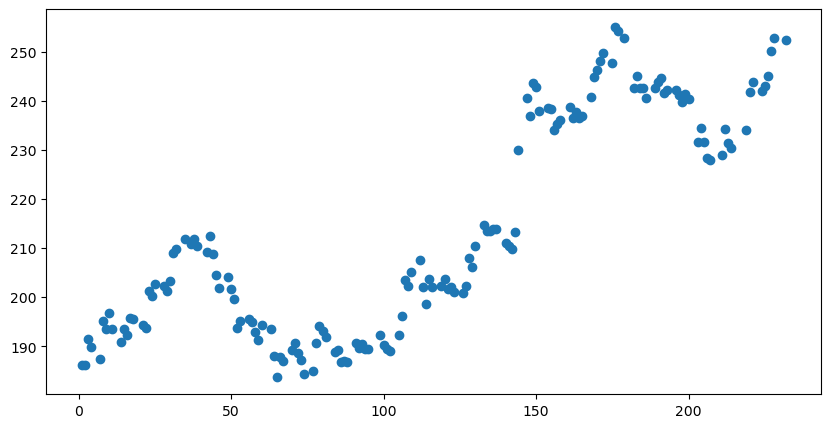

In [31]:
# Визуализируем данные и регрессионную линию
plt.figure(figsize=(10, 5))
plt.scatter(X_train['Days'], y_train, label='Исходные данные')
plt.plot(X_train['Days'], model.predict(np.array(X_train)), color='green', label='МНК', ls='dashed')
plt.scatter(X_test['Days'], y_test, color='orange', label='Тестовые данные')
plt.plot(X_test['Days'], res_mnk, color='red', label='МНК на тестовых данных')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

### SVM

In [32]:
from sklearn.svm import SVR

# Создайте модель SVM для регрессии
model = SVR(kernel='linear', C=1.0)

# Обучите модель на тренировочных данных
res_svm = model.fit(X_train, y_train).predict(X_test)

In [ ]:
# Визуализация данных и регрессии
plt.figure(figsize=(10, 5))
plt.scatter(X_test['Days'], y_test, color='orange', label='Тестовые данные')
plt.plot(X_test['Days'], res_svm, color='blue', label='SVM')
#для сравнения, добавим данные, полученные в предыдущем примере
# plt.plot(X_test['Days'], res_mnk, color='red', label='МНК')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

### kNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Создаем и обучаем модель k-NN
k = 5  # Количество соседей (замените на нужное значение)
model = KNeighborsRegressor(n_neighbors=k)
model.fit(X_train, y_train)

# Делаем прогноз
res_knn = model.predict(X_test)

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(X_test['Days'], res_knn, color='green', label='kNN')
#для сравнения, добавим данные, полученные в предыдущем примере
# plt.plot(X_test['Days'], res_mnk, color='red', label='МНК')
# plt.plot(X_test['Days'], res_svm, color='blue', label='SVM')
plt.scatter(X_test['Days'], y_test, color='orange', label='Данные теста')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

### Lasso (Least absolute shrinkage and selection operator)

 Регрессия по методу наименьших квадратов (МНК) часто может стать неустойчивой, то есть сильно зависящей от обучающих данных, что обычно является проявлением тенденции к переобучению. Избежать такого переобучения помогает регуляризация - общий метод, заключающийся в наложении дополнительных ограничений на искомые параметры, которые могут предотвратить излишнюю сложность модели. Смысл процедуры заключается в “стягивании” в ходе настройки вектора коэффициентов  β  таким образом, чтобы они в среднем оказались несколько меньше по абсолютной величине, чем это было бы при оптимизации по МНК.

 Метод регрессии “лассо” (LASSO, Least Absolute Shrinkage and Selection Operator) заключается во введении дополнительного слагаемого регуляризации в функционал оптимизации модели, что часто позволяет получать более устойчивое решение. Условие минимизации квадратов ошибки при оценке параметров  $\hat{\beta}$
  выражается следующей формулой:

$\hat{\beta} = argmin(\sum_{i}^n(y_i-\sum_{j}^m \beta x_{ij})^2 + \lambda |\beta|)$,
где  λ  - параметр регуляризации, имеющий смысл штрафа за сложность.

λ = 0, метод ЛАССО сводится к МНК, а при увеличении $\lambda$ формируемая модель становится все более “лаконичной”, пока не превратится в нуль-модель.

Метод Лассо также иногда называют  L1-регуляризацией.

Оптимальная $\lambda$ находится с использованием кросс-валидации (т.е. такая $\lambda$, которой соответствует наименьшая ошибка прогноза)


In [ ]:
from sklearn.linear_model import Lasso
# Создаем и обучаем модель Lasso-регрессии
alpha = 0.3  # Параметр регуляризации (замените на желаемое значение)
model = Lasso(alpha=alpha)
model.fit(X_train, y_train)

# Делаем прогноз
res_lasso = model.predict(X_test)

# Графики

plt.figure(figsize=(10, 5))


plt.scatter(X_test['Days'], y_test, label='Данные', color="orange")
#для сравнения, добавим данные, полученные в предыдущем примере
plt.plot(X_test['Days'], res_knn, color='green', label='kNN')
plt.plot(X_test['Days'], res_mnk, color='red', label='МНК')
plt.plot(X_test['Days'], res_svm, color='blue', label='SVM')

plt.plot(X_test['Days'], res_lasso, color="black", label='Lasso', ls='dashed')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

### Метод частных наименьших квадратов (PLS)

Основная цель PLS - это уменьшить размерность набора данных, проектируя исходные признаки на некоторое меньшее число новых признаков (компонентов), которые линейно связаны с зависимой переменной. Это помогает улучшить способность модели к предсказанию, особенно в случаях, когда исходный набор признаков мультиколлинеарен (сильно коррелируют между собой) или имеет много шумовых переменных.

Общая базовая модель многомерного PLS:

$X=TP^T+E$
$Y=UQ^T+F$

где $X$ - матрица предикторов $m*n$, $Y$ - матрица ответов $n*p$; $T$ и $U$ - это матрицы $n*l$, которые являются, соответственно, проекциями $X$ (оценка X, матрица компонентов или факторов) и проекциями Y (Y баллы); $P$ и $Q$,соответственно $m*l$ и $ p*l$ , и ортогональная загрузка. матрицы; а матрицы $E$ и $F$ - это члены ошибок, которые считаются независимыми и одинаково распределенными случайными нормальными величинами. Разложение $X$ и $Y$ производится таким образом, чтобы максимизировать ковариацию между $T$ и $U$.

(Источник https://wiki5.ru/wiki/Partial_least_squares_regression)



In [ ]:
from sklearn.cross_decomposition import PLSRegression

# Создаем и обучаем модель PLS
n_components = 3 # Количество компонент PLS (замените на желаемое значение)
model = PLSRegression(n_components=n_components)
model.fit(X_train, y_train)

# Делаем прогноз
res_pls = model.predict(X_test)

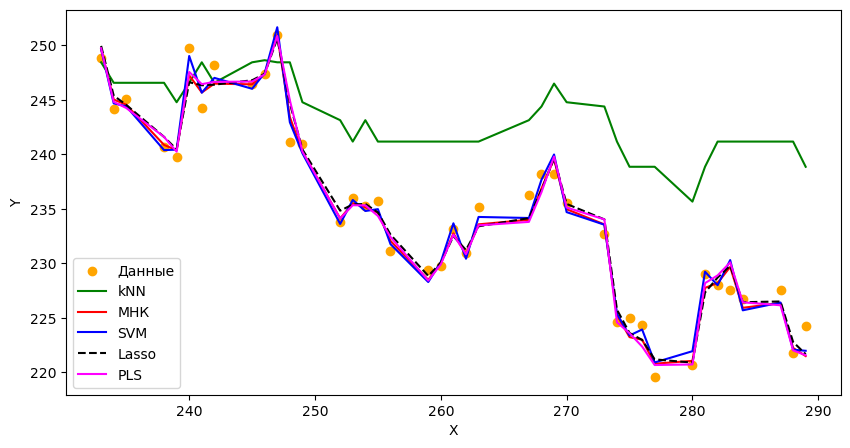

In [ ]:
# Графики

plt.figure(figsize=(10, 5))

plt.scatter(X_test['Days'], y_test, color="orange", label='Данные')
#для сравнения, добавим данные, полученные в предыдущем примере
# plt.plot(X_test['Days'], res_knn, color='green', label='kNN')
# plt.plot(X_test['Days'], res_mnk, color='red', label='МНК')
# plt.plot(X_test['Days'], res_svm, color='blue', label='SVM')
# plt.plot(X_test['Days'], res_lasso, color="black", label='Lasso', ls='dashed')
plt.plot(X_test['Days'], res_pls, color="magenta", label='PLS')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

Задание тут https://github.com/annaprovorova/HSE_ML_course_2024-2025